In [2]:
import pandas as pd
df_test = pd.read_csv("171819_DATA.csv")
df_test.columns

Index(['Unnamed: 0', 'VendorID', 'lpep_pickup_datetime',
       'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_hour', 'pickup_minutes', 'dropOff_year',
       'dropOff_month', 'dropOff_day', 'dropOff_hour', 'dropOff_minutes',
       'duration'],
      dtype='object')

In [3]:
#Adding trip duration to the matrix
trip_dur=[]

for pu_hr, do_hr, pu_min, do_min in zip(df_test.pickup_hour, df_test.dropOff_hour, df_test.pickup_minutes, df_test.dropOff_minutes):
    if pu_hr == do_hr:
        trip_dur.append(do_min-pu_min) 
    else:
        if pu_hr > do_hr:
            if pu_min > do_min:
                trip_dur.append((24-pu_hr+do_hr)*60 - (pu_min - do_min))
            else:
                trip_dur.append((24-pu_hr+do_hr)*60 - (do_min - pu_min))
        else:
            if pu_min > do_min:
                trip_dur.append((do_hr-pu_hr)*60 - (pu_min - do_min))
            else:
                trip_dur.append((do_hr-pu_hr)*60 - (do_min - pu_min))

In [4]:
gr_pickup_loc=df_test.groupby(['PULocationID']).sum()
gr_dropoff_loc=df_test.groupby(['DOLocationID']).sum()
gr_pickup_hr=df_test.groupby(['pickup_hour']).sum()
gr_dropoff_hr=df_test.groupby(['dropOff_hour']).sum()
gr_payty=df_test.groupby(['payment_type']).sum()

Text(0, 0.5, 'Total Amount')

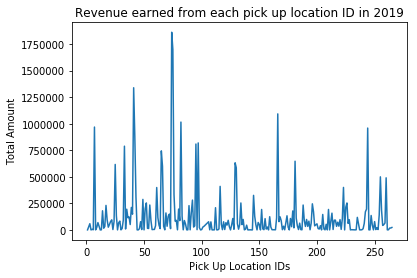

In [6]:
import matplotlib.pyplot as plt
#the revenue generated from each pick up location
plt.plot(gr_pickup_loc['total_amount'])
plt.title("Revenue earned from each pick up location ID in 2019")
plt.xlabel("Pick Up Location IDs")
plt.ylabel("Total Amount")

Text(0, 0.5, 'Total Amount')

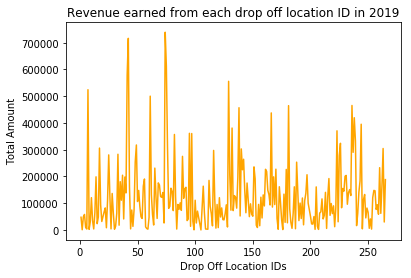

In [7]:
#the revenue generated from each drop off location
plt.plot(gr_dropoff_loc['total_amount'], color='orange')
plt.title("Revenue earned from each drop off location ID in 2019")
plt.xlabel("Drop Off Location IDs")
plt.ylabel("Total Amount")

Text(0, 0.5, 'Average Total Amount')

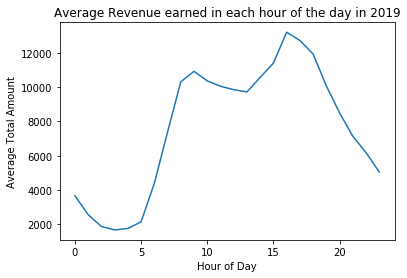

In [8]:
#the trend of revenue generation during the day 
plt.plot(gr_pickup_hr['total_amount']/180)
plt.title("Average Revenue earned in each hour of the day in 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Amount")

Text(0, 0.5, 'Average Total Amount')

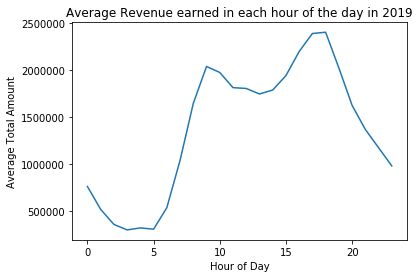

In [9]:
plt.plot(gr_dropoff_hr['total_amount'])
plt.title("Average Revenue earned in each hour of the day in 2019")
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Amount")

In [10]:
data=df_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'pickup_year', 'dropOff_year'], axis=1)
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,pickup_month,pickup_day,pickup_hour,pickup_minutes,dropOff_month,dropOff_day,dropOff_hour,dropOff_minutes
VendorID,1,0.103131,0.00235771,0.000191864,0.073713,0.0347167,0.0308921,-0.208853,0.00330042,-0.00726723,0.0278325,-0.103491,0.0285993,-0.0597398,0.103854,-0.00194609,0.000760007,0.00404036,-0.00495525,-0.00189489,0.000813922,0.0046454,-0.00106947
RatecodeID,0.103131,1,0.063111,0.00939107,-0.078769,0.368191,0.342424,-0.196802,-0.334162,-0.119442,0.202371,-0.976815,0.300917,-0.167131,0.975766,-0.00413463,0.0102239,-0.0735219,-0.0278458,-0.00416614,0.0101638,-0.0571216,0.00494009
PULocationID,0.00235771,0.063111,1,0.139975,0.00332807,0.076912,0.0726521,-0.00646487,-0.0493829,0.00668446,0.042449,-0.0621818,0.0699329,-0.0332802,0.0622376,-0.00270091,0.00315329,-0.0247098,-0.00669878,-0.00266961,0.0031158,-0.0248983,-0.000318908
DOLocationID,0.000191864,0.00939107,0.139975,1,0.00462706,0.0616823,0.0611736,0.0510933,-0.0181917,0.0913269,0.0274907,-0.00706163,0.0834016,-0.0407782,0.00680654,-0.00307656,0.00239836,-0.0109502,0.000523035,-0.00307274,0.00241903,-0.00966773,0.00560718
passenger_count,0.073713,-0.078769,0.00332807,0.00462706,1,-0.0282475,-0.0221958,0.00273317,-0.00142424,0.0137425,-0.0139237,0.0757503,-0.0184008,0.00719179,-0.0758501,-0.00585584,-0.000965971,0.0072653,0.00156795,-0.00583728,-0.000973401,0.0058279,-0.0010418
trip_distance,0.0347167,0.368191,0.076912,0.0616823,-0.0282475,1,0.861384,-0.0804596,-0.0146001,0.0910371,0.511486,-0.352849,0.855015,-0.222009,0.352612,-0.00979648,0.00481995,-0.0816405,-0.02142,-0.00975217,0.00492134,-0.0594002,0.00589835
fare_amount,0.0308921,0.342424,0.0726521,0.0611736,-0.0221958,0.861384,1,-0.0762176,-0.0470011,0.105934,0.475434,-0.324212,0.982997,-0.231824,0.323316,-0.00296934,0.00337834,-0.0773138,-0.0215643,-0.00292575,0.00355924,-0.0520609,0.00546081
extra,-0.208853,-0.196802,-0.00646487,0.0510933,0.00273317,-0.0804596,-0.0762176,1,0.0697058,0.131487,-0.0548625,0.195915,-0.0203884,0.0346229,-0.19568,0.0577493,-0.00577453,0.288644,-0.0060123,0.0577998,-0.00572027,0.274068,-0.000585854
mta_tax,0.00330042,-0.334162,-0.0493829,-0.0181917,-0.00142424,-0.0146001,-0.0470011,0.0697058,1,-0.00715624,-0.00940771,0.361213,-0.035752,-0.0726479,-0.358867,-0.00651358,0.00161583,0.0175562,-0.00185364,-0.00652925,0.00163244,0.0172916,0.0015949
tip_amount,-0.00726723,-0.119442,0.00668446,0.0913269,0.0137425,0.0910371,0.105934,0.131487,-0.00715624,1,0.047504,0.129343,0.256552,-0.397395,-0.128949,0.0198652,0.00182366,0.0335634,0.00634399,0.0198949,0.00193224,0.0283822,0.00355897


In [ ]:
import collections
import numpy as np

def bar_view(s, width, color):
    ctr = collections.Counter(s)
    x,y=[],[]
    for key, value in ctr.items():
        x.append(key)
        y.append(value)
    
    plt.figure(figsize=(10,10))
    plt.bar(x,y,align='edge', width=width, color=color, edgecolor='black')
    
s=sorted(data['PULocationID'])
b=bar_view(s,2, 'blue')
plt.title("Frequency of rides based on pick up location IDs")
plt.xlabel("Pick up location IDs")

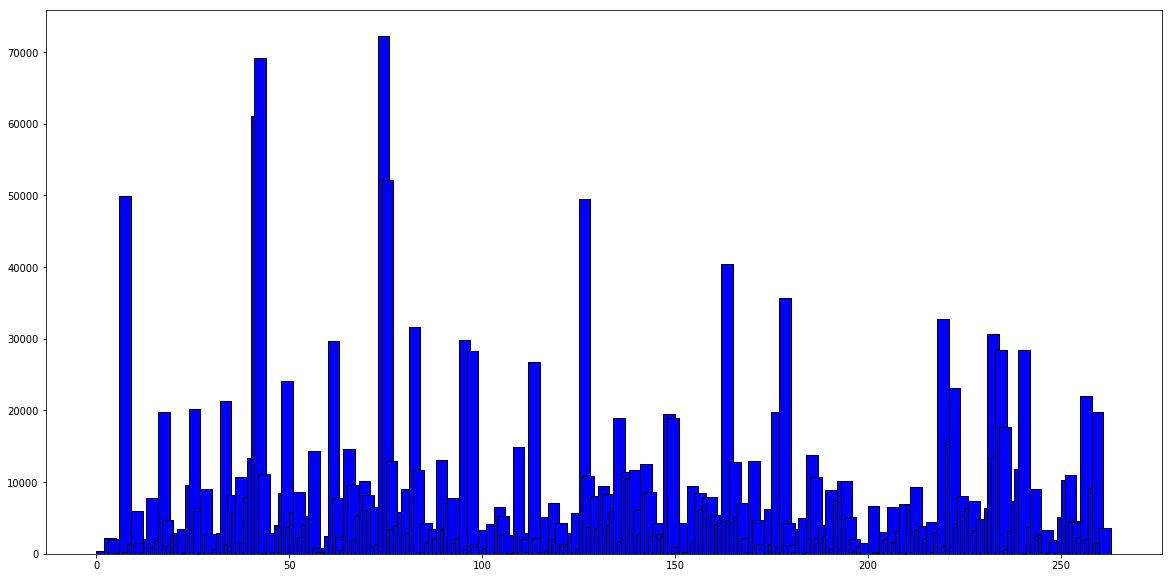

In [111]:
s=sorted((data['DOLocationID']))
b=bar_view(s, 3, 'blue')

(30000, 84342.3)

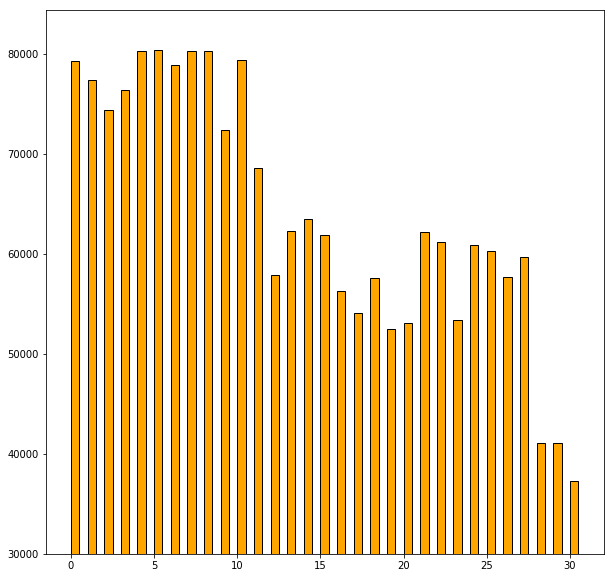

In [116]:
s=sorted((data['pickup_day']))
b=bar_view(s, 0.5, 'orange')
plt.ylim(30000, )

pickup_month
1    1.004967e+07
2    9.561821e+06
3    9.921641e+06
4    3.487060e+06
5    9.750000e+01
6    3.496000e+01
Name: total_amount, dtype: float64


(1000000.0, 10552152.618003672)

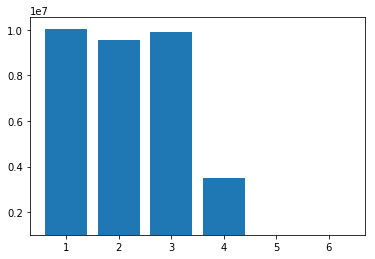

In [117]:
gr_pu_mon=data.groupby(['pickup_month']).sum()
print(gr_pu_mon['total_amount'])
plt.bar(np.arange(6)+1,gr_pu_mon['total_amount'])
plt.ylim(1e+6, )

(0, 100)

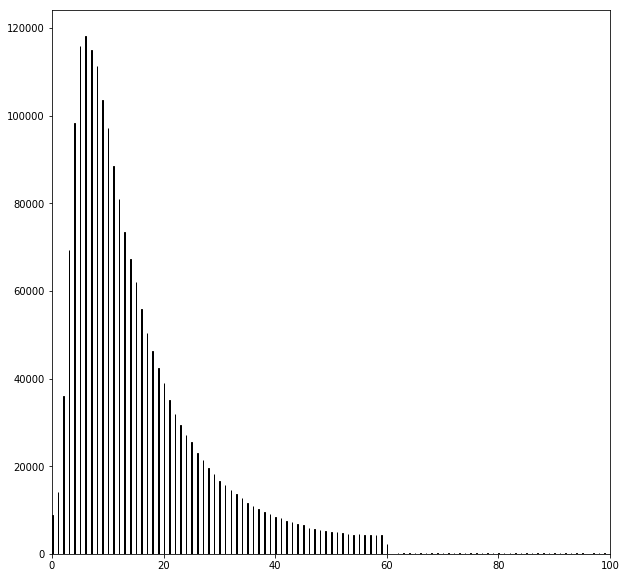

In [169]:
#distribution of trip durations
ctr = collections.Counter(sorted(data['duration']))
x, y=[],[]
for key, value in ctr.items():
    x.append(key)
    y.append(value)

plt.figure(figsize=(10,10))
plt.bar(x,y,align='edge', width=0.1, color='orange', edgecolor='black')
plt.xlim(0,100)


(0, 10)

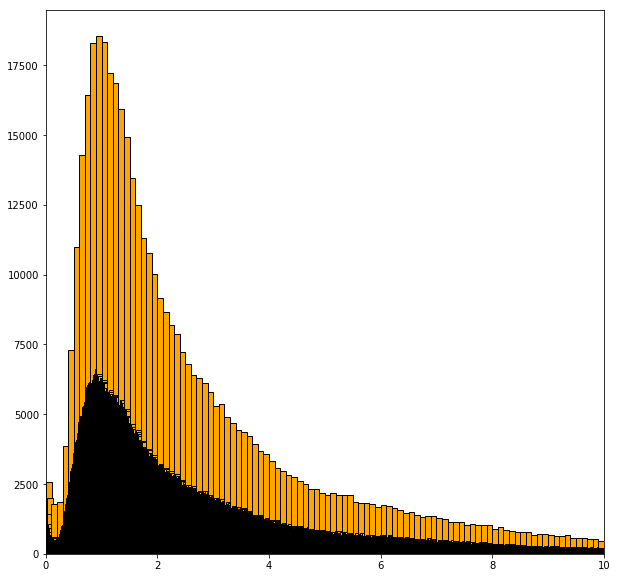

In [158]:
ctr = collections.Counter(sorted(data['trip_distance']))
x, y=[],[]
for key, value in ctr.items():
    x.append(key)
    y.append(value)

plt.figure(figsize=(10,10))
plt.bar(x,y,align='edge', width=0.1, color='orange', edgecolor='black')
plt.xlim(0,10)